<BarContainer object of 3 artists>

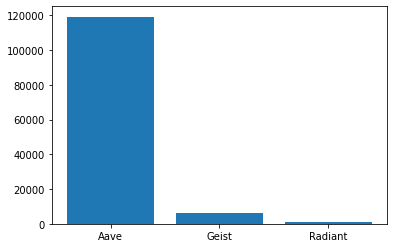

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

## Plot the number of holders for each token

# Blockhain explorer URLs
aave_token_url = 'https://etherscan.io/token/0x7fc66500c84a76ad7e9c93437bfc5ac33e2ddae9#balances'
geist_token_url = 'https://ftmscan.com/token/0xd8321aa83fb0a4ecd6348d4577431310a6e0814d#balances'
radiant_token_url = 'https://arbiscan.io/token/0x0c4681e6c0235179ec3d4f4fc4df3d14fdd96017#balances'

# Get the HTML for each token
# Note: Requests to Etherscan will fail if the User-Agent header is missing
aave_token_html = BeautifulSoup(requests.get(aave_token_url, headers={'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, '
                               'like Gecko) Chrome/50.0.2661.102 Safari/537.36'}).text, 'html.parser')
geist_token_html = BeautifulSoup(requests.get(geist_token_url).text, 'html.parser')
radiant_token_html = BeautifulSoup(requests.get(radiant_token_url).text, 'html.parser')

# Scrape the number of holders from the html
aave_number_of_holders = int(aave_token_html.find(id="ContentPlaceHolder1_tr_tokenHolders").find('div', {'class': 'mr-3'}).text.split(' ')[0].split('\n')[1].replace(',',''))
geist_number_of_holders = int(geist_token_html.find(id="ContentPlaceHolder1_tr_tokenHolders").find('div', {'class': 'col-md-8'}).text.split(' ')[0].split('\n')[1].replace(',',''))
radiant_number_of_holders = int(radiant_token_html.find(id="ContentPlaceHolder1_tr_tokenHolders").find('div', {'class': 'mr-3'}).text.split(' ')[36])
    
# Use matplotlib to display the data
number_of_holders = {'Aave': aave_number_of_holders, 'Geist': geist_number_of_holders, 'Radiant': radiant_number_of_holders}
plt.bar(list(number_of_holders.keys()), list(number_of_holders.values()))

In [2]:
aave_holders_raw = pd.read_csv('aave-token-holders.csv')
geist_holders_raw = pd.read_csv('geist-token-holders.csv')
radiant_holders_raw = pd.read_csv('radiant-token-holders.csv')

# Clean Data (Part I)
# Remove rows with the zero address
aave_holders_first_clean = aave_holders_raw[aave_holders_raw['HolderAddress'] != '0x0000000000000000000000000000000000000000']
geist_holders_first_clean = geist_holders_raw[geist_holders_raw['HolderAddress'] != '0x0000000000000000000000000000000000000000']
radiant_holders_first_clean = radiant_holders_raw[radiant_holders_raw['HolderAddress'] != '0x0000000000000000000000000000000000000000']

# Clean Data (Part II)
# Remove rows with zero balance
aave_holders = aave_holders_first_clean[aave_holders_first_clean['Balance'] != 0]
geist_holders = geist_holders_first_clean[geist_holders_first_clean['Balance'] != 0]
radiant_holders = radiant_holders_first_clean[radiant_holders_first_clean['Balance'] != 0]